# Chapter 2 - Financial Data Structures

In [4]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!ls /home/gerard/Git/freqtrade/user_data/data/binance/*.h5

/home/gerard/Git/freqtrade/user_data/data/binance/BTC_EUR-trades.h5
/home/gerard/Git/freqtrade/user_data/data/binance/ETH_EUR-trades.h5
/home/gerard/Git/freqtrade/user_data/data/binance/XRP_EUR-trades.h5


In [6]:
df = pd.read_hdf("/home/gerard/Git/freqtrade/user_data/data/binance/BTC_EUR-trades.h5")

In [7]:
len(df), df.columns.tolist()

(2517210, ['timestamp', 'id', 'type', 'side', 'price', 'amount', 'cost'])

In [8]:
df['timestamp'] = df['timestamp'] / 1000 # Go from ms to s

In [9]:
min(df["timestamp"]), max(df["timestamp"])

(1590624100.784, 1606256910.943)

In [10]:
sample_df = df.head(10000)
sample_df['timestamp_obj'] = pd.to_datetime(sample_df['timestamp'], unit='s')
sample_df.set_index('timestamp_obj', inplace=True)

/home/gerard/.miniconda3/envs/big-stock/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


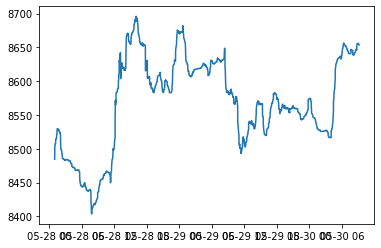

In [11]:
plt.plot(sample_df['price'].rolling(100).mean())

In [12]:
df['side'].unique()

array(['sell', 'buy'], dtype=object)

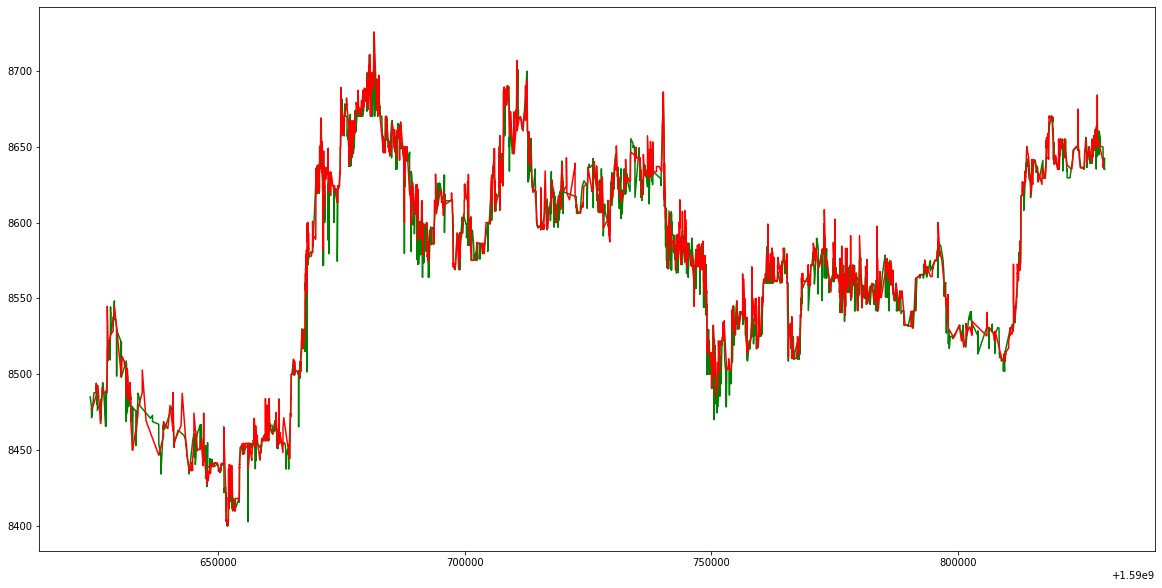

In [13]:
def plot_trades(df):
    plt.figure(figsize=(20,10))
    sell_df = df[df['side'] == 'sell']
    plt.plot(sell_df['timestamp'], sell_df['price'], c='green')
    buy_df = df[df['side'] == 'buy']
    plt.plot(buy_df['timestamp'], buy_df['price'], c='red')
    
plot_trades(sample_df)

In [ ]:
# The range in seconds from start to finish
min_t = sample_df['timestamp'].min()
max_t = sample_df['timestamp'].max()
delta_t = max_t - min_t

print("Min, max, delta T and avg trades / min")
print(min_t, max_t, delta_t, len(sample_df) / delta_t * 60)

In [ ]:
datetime.datetime.fromtimestamp(sample_df['timestamp'][0]), datetime.datetime.fromtimestamp(sample_df['timestamp'][1])

In [ ]:
ts = np.arange(sample_df['timestamp'].min(), sample_df['timestamp'].max(), 60)
len(ts) ,ts[0], ts[-1]

In [ ]:
sample_df.groupby(pd.Grouper(freq="5min"))

In [ ]:
sample_df.head(10)

In [ ]:
ohlc_df = sample_df.groupby(pd.Grouper(freq="10min")).agg({'price': 'ohlc'})
ohlc_df.head(1)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ohlc_df['price']['low'])
plt.plot(sample_df['price'])

### From https://www.investopedia.com/articles/trading/11/trading-with-vwap-mvwap.asp

* Choose your time frame (tick chart, 1 minute, 5 minutes, etc.)
* Calculate the typical price for the first period (and all periods in the day following). Typical price is attained by taking adding the high, low and close, and dividing by three: (H+L+C)/3
* Multiply this typical price by the volume for that period. This will give you a value called TPV.
* Keep a running total of the TPV values, called cumulative-TPV. This is attained by continually adding the most recent TPV to the prior values (except for the first period, since there will be no prior value). This figure should get larger as the day progresses.
* Keep a running total of cumulative volume. Do this by continually adding the most recent volume to the prior volume. This number should also get larger as the day progresses.
* Calculate VWAP with your information: [cumulative TPV ÷ cumulative volume]. This will provide a volume weighted average price for each period and will provide the data to create the flowing line that overlays the price data on the chart.

In [ ]:
def vwap(x):
    print(x)
    print()
    return x

volume_sum = sample_df['amount'].sum()
price_sum = 
mean_price = sample_df.groupby(pd.Grouper(freq="10min")).agg({'price': 'mean'})['price']
mean_volume = sample_df.groupby(pd.Grouper(freq="10min")).agg({'amount': 'sum'})['amount']
vwap = mean_price * mean_volume
plt.plot(vwap)

## Tick Imbalance Bars

Rather than relying on arbitrary sampling techniques such as the price, tick and volume bars the book proposes to use information driven bars. Specifically the tick rule is used, which states that at a timepoint $p_t the computed tick balance of the previous point is used if there is no change in price. If there is a price change the direction of change is used, either -1, 1. 

TODO: Define the formal definition below:


$    f(x)= 
\begin{cases}
    b_t = b_{t-1},& \text{if } x\geq 1\\
    0,              & \text{otherwise}
\end{cases}
<!--  -->

In [ ]:
price_delta_dir = abs(sample_df['price'].diff()) / sample_df['price'].diff()
price_delta_dir.fillna(0, inplace=True)
list(zip(sample_df['price'], price_delta_dir))[:10]
# sample_df['tick_imbalance'] =

In [ ]:
np.cumsum(price_delta_dir)

In [ ]:
sample_df['tick_imbalance'] = np.cumsum(price_delta_dir)

In [ ]:
diff_df = sample_df['price'].diff()
ticks = diff_df != 0 *  

## MLFinLab

As much as I would like to intimately understand the particulars of financial data and the tick bars I think it would be more productive to use already existing code. One interesting repo I found after googling around for tick bars and the like from above, was [mlfinlab]('')

In [19]:
from mlfinlab.datasets import load_tick_sample, load_stock_prices, load_dollar_bar_sample

tick_df = load_tick_sample()
dollar_bars_df = load_dollar_bar_sample()
stock_prices_df = load_stock_prices()

In [15]:
tick_df

,Price,Volume
Date and Time,,
2011-07-31 22:38:45.108,1205.00,1
2011-07-31 22:38:45.934,1005.00,1
2011-07-31 22:38:47.008,1304.75,6
2011-07-31 22:38:48.944,1904.75,1
2011-07-31 22:38:52.951,1304.75,20
...,...,...
2011-07-31 22:40:44.921,1305.25,5
2011-07-31 22:40:44.921,1305.25,1
2011-07-31 22:40:44.921,1305.25,1


In [18]:
dollar_bars_df

,open,high,low,close,cum_vol,cum_dollar,cum_ticks
date_time,,,,,,,
2015-01-01 23:00:23.723,2053.00,2056.75,2051.00,2056.75,34102,70001096.75,8478
2015-01-02 07:07:35.156,2056.75,2067.25,2056.25,2064.00,33968,70010061.25,14514
2015-01-02 09:35:57.204,2064.00,2067.25,2058.75,2060.50,33972,70087834.25,16152
2015-01-02 12:59:42.176,2060.50,2062.00,2057.75,2061.00,33985,70006169.75,15502
2015-01-02 14:19:33.847,2061.00,2064.25,2058.75,2063.75,33958,70000723.25,12332
...,...,...,...,...,...,...,...
2015-01-29 15:17:46.613,1992.75,1994.00,1989.25,1992.75,35145,70000702.25,12121
2015-01-29 15:24:43.031,1992.75,1994.50,1988.50,1988.50,35140,70003043.00,13330
2015-01-29 15:31:19.688,1988.50,1994.75,1988.00,1993.00,35145,70008047.00,12803
